<a href="https://colab.research.google.com/github/oubouza/dataset/blob/main/result_dataset_49_heart_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importer les librairies

In [110]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [111]:
import urllib.request
Data_path = os.path.join("Dataset", "/csv_result-dataset_49_heart-c.csv")
download_path = "https://raw.githubusercontent.com/oubouza/project/main/csv_result-dataset_49_heart-c.csv"
os.makedirs("Dataset", exist_ok=True)
urllib.request.urlretrieve(download_path, Data_path)
Data=pd.read_csv(Data_path, thousands=',')

In [112]:
#Importer dataset
Data=df = pd.read_csv('/content/csv_result-dataset_49_heart-c.csv')
df

,id,'age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'
0,1,63,male,typ_angina,145,233,t,left_vent_hyper,150,no,2.3,down,0,fixed_defect,<50
1,2,67,male,asympt,160,286,f,left_vent_hyper,108,yes,1.5,flat,3,normal,>50_1
2,3,67,male,asympt,120,229,f,left_vent_hyper,129,yes,2.6,flat,2,reversable_defect,>50_1
3,4,37,male,non_anginal,130,250,f,normal,187,no,3.5,down,0,normal,<50
4,5,41,female,atyp_angina,130,204,f,left_vent_hyper,172,no,1.4,up,0,normal,<50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,68,male,asympt,144,193,t,normal,141,no,3.4,flat,2,reversable_defect,>50_1
299,300,57,male,asympt,130,131,f,normal,115,yes,1.2,flat,1,reversable_defect,>50_1
300,301,57,female,atyp_angina,130,236,f,left_vent_hyper,174,no,0.0,flat,1,normal,>50_1
301,302,38,male,non_anginal,138,175,f,normal,173,no,0.0,up,?,normal,<50


In [113]:
Data.describe()

,id,'age','trestbps','chol','thalach','oldpeak'
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.366337,131.623762,246.264026,149.646865,1.039604
std,87.612784,9.082101,17.538143,51.830751,22.905161,1.161075
min,1.000000,29.000000,94.000000,126.000000,71.000000,0.000000
25%,76.500000,47.500000,120.000000,211.000000,133.500000,0.000000
50%,152.000000,55.000000,130.000000,240.000000,153.000000,0.800000
75%,227.500000,61.000000,140.000000,274.500000,166.000000,1.600000
max,303.000000,77.000000,200.000000,564.000000,202.000000,6.200000


In [114]:
#voir les valeurs non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          303 non-null    int64  
 1   'age'       303 non-null    int64  
 2   'sex'       303 non-null    object 
 3   'cp'        303 non-null    object 
 4   'trestbps'  303 non-null    int64  
 5   'chol'      303 non-null    int64  
 6   'fbs'       303 non-null    object 
 7   'restecg'   303 non-null    object 
 8   'thalach'   303 non-null    int64  
 9   'exang'     303 non-null    object 
 10  'oldpeak'   303 non-null    float64
 11  'slope'     303 non-null    object 
 12  'ca'        303 non-null    object 
 13  'thal'      303 non-null    object 
 14  'num'       303 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 35.6+ KB


In [115]:
df.isnull().sum()

id            0
'age'         0
'sex'         0
'cp'          0
'trestbps'    0
'chol'        0
'fbs'         0
'restecg'     0
'thalach'     0
'exang'       0
'oldpeak'     0
'slope'       0
'ca'          0
'thal'        0
'num'         0
dtype: int64

<Axes: >

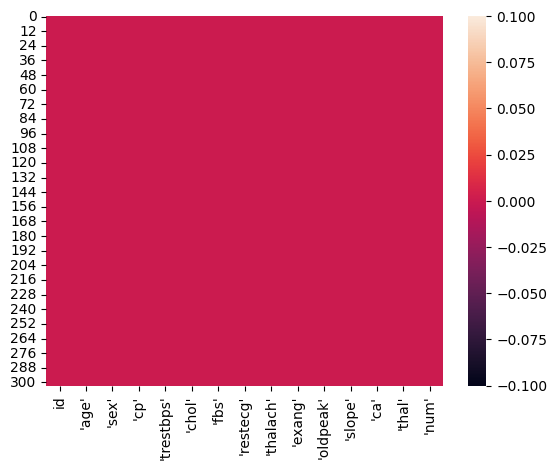

In [116]:
sns.heatmap(df.isnull())

In [117]:
Data.duplicated().sum()

0

Analysis


In [118]:
Data['id'].value_counts()

1      1
209    1
207    1
206    1
205    1
      ..
101    1
100    1
99     1
98     1
303    1
Name: id, Length: 303, dtype: int64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': "'age'"}>],
       [<Axes: title={'center': "'trestbps'"}>,
        <Axes: title={'center': "'chol'"}>],
       [<Axes: title={'center': "'thalach'"}>,
        <Axes: title={'center': "'oldpeak'"}>]], dtype=object)

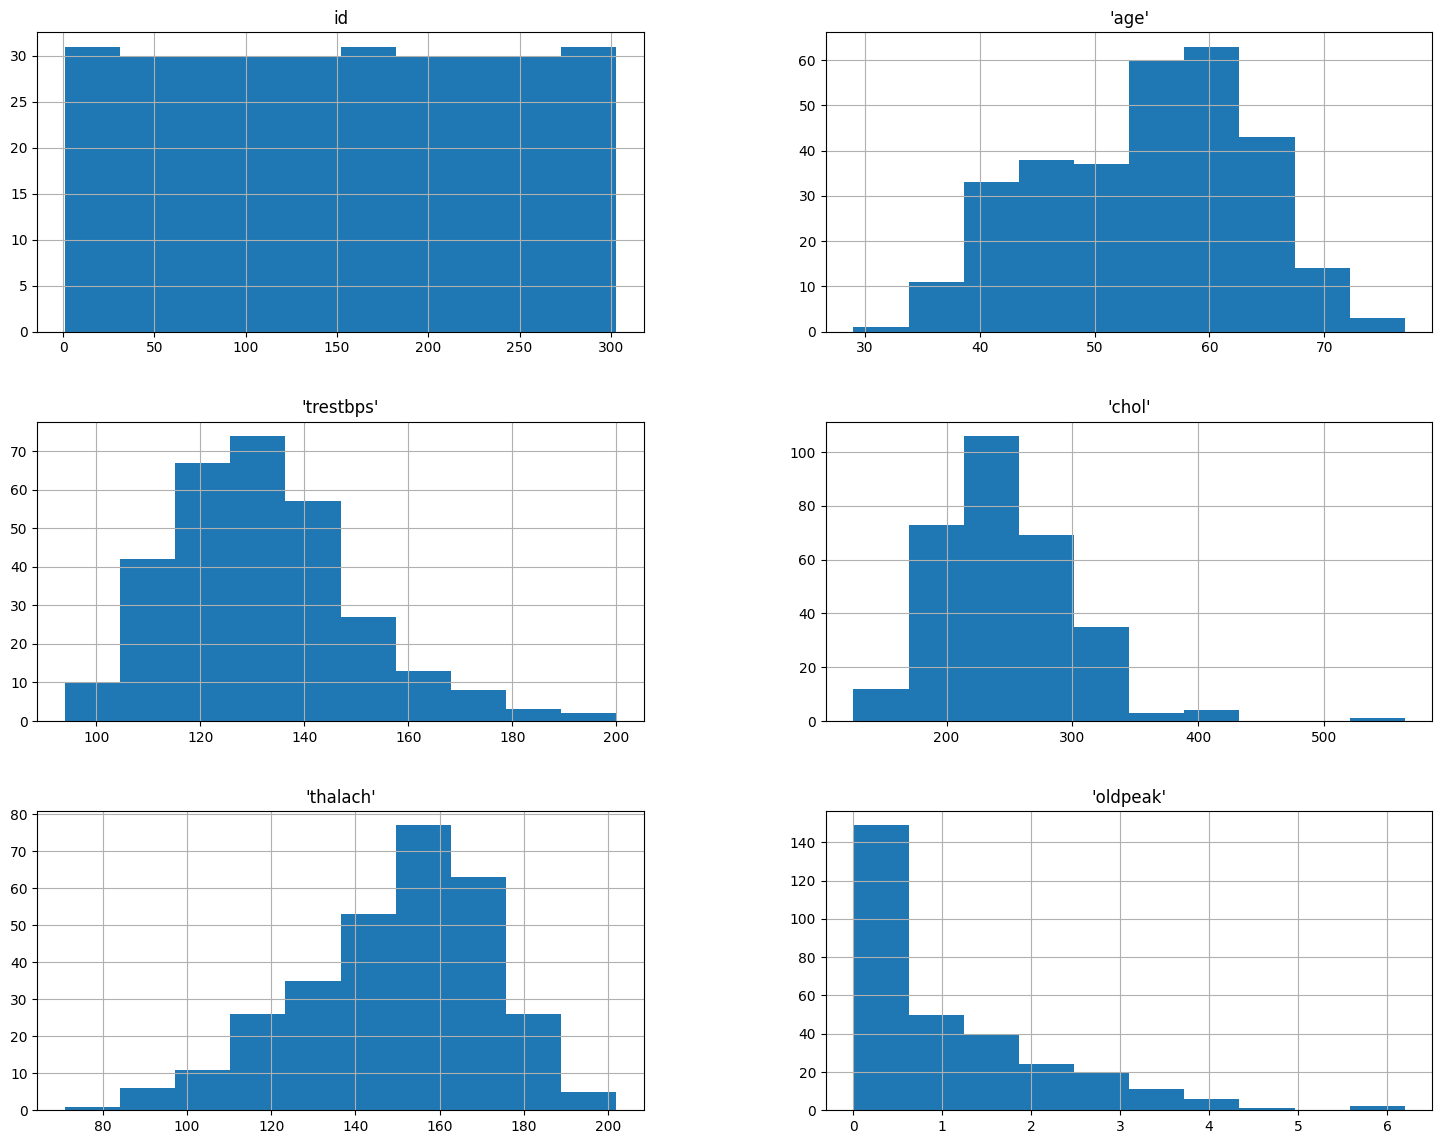

In [119]:
Data.hist(figsize=(18,14))

In [120]:
cor=Data.corr()

<ipython-input-120-8b0aad432088>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=Data.corr()


<Axes: >

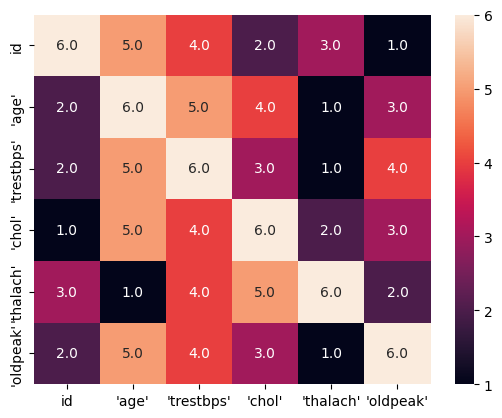

In [121]:
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt='.1f')

Processing Data


In [122]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [123]:
obj=Data.select_dtypes(include='object')
non_obj=Data.select_dtypes(exclude='object')

In [124]:
for i in range(0,obj.shape[1]):
  obj.iloc[:,i]=lab.fit_transform(obj.iloc[:,i])

<ipython-input-124-015437255f5d>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i]=lab.fit_transform(obj.iloc[:,i])
<ipython-input-124-015437255f5d>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i]=lab.fit_transform(obj.iloc[:,i])
<ipython-input-124-015437255f5d>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.ise

In [125]:
Data["'num'"].value_counts()

<50      165
>50_1    138
Name: 'num', dtype: int64

Linear Regression

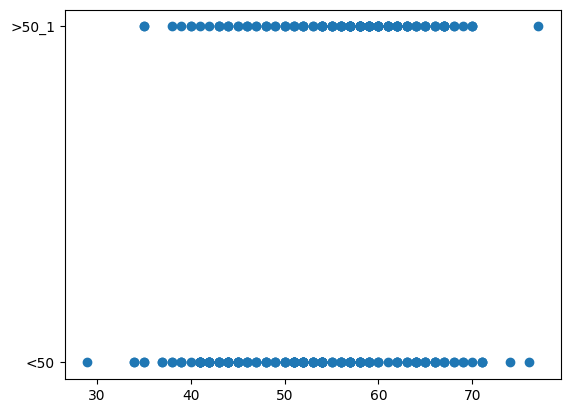

In [126]:
# afficher nuage de points
plt.scatter(Data["'age'"],Data["'num'"])

In [127]:
# exclure les donnees dont id supérieur à 20000
Data=Data[Data['id']<=27000]
df

,id,'age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'
0,1,63,male,typ_angina,145,233,t,left_vent_hyper,150,no,2.3,down,0,fixed_defect,<50
1,2,67,male,asympt,160,286,f,left_vent_hyper,108,yes,1.5,flat,3,normal,>50_1
2,3,67,male,asympt,120,229,f,left_vent_hyper,129,yes,2.6,flat,2,reversable_defect,>50_1
3,4,37,male,non_anginal,130,250,f,normal,187,no,3.5,down,0,normal,<50
4,5,41,female,atyp_angina,130,204,f,left_vent_hyper,172,no,1.4,up,0,normal,<50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,68,male,asympt,144,193,t,normal,141,no,3.4,flat,2,reversable_defect,>50_1
299,300,57,male,asympt,130,131,f,normal,115,yes,1.2,flat,1,reversable_defect,>50_1
300,301,57,female,atyp_angina,130,236,f,left_vent_hyper,174,no,0.0,flat,1,normal,>50_1
301,302,38,male,non_anginal,138,175,f,normal,173,no,0.0,up,?,normal,<50


In [128]:
X=Data.iloc[:,:-1].values
y=Data.iloc[:,:-1].values

In [129]:
# Check the column names in your DataFrame
print("Column names:", df.columns)


Column names: Index(['id', ''age'', ''sex'', ''cp'', ''trestbps'', ''chol'', ''fbs'',
       ''restecg'', ''thalach'', ''exang'', ''oldpeak'', ''slope'', ''ca'',
       ''thal'', ''num''],
      dtype='object')


In [130]:
# Assuming 'target_column' is the correct column name you want to predict
target_column = 'target_column'

In [131]:
len(X)

303

Text(0.5, 1.0, 'Count of 58.0 in the Dataset')

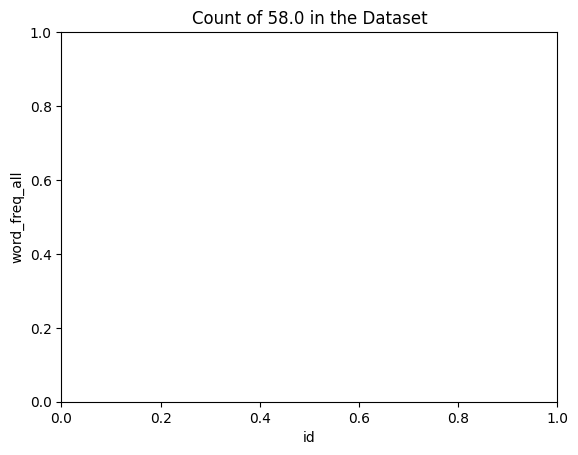

In [132]:
# Set plot labels and title
plt.xlabel('id')
plt.ylabel('word_freq_all')
plt.title('Count of 58.0 in the Dataset')

<Axes: xlabel="'num'", ylabel='count'>

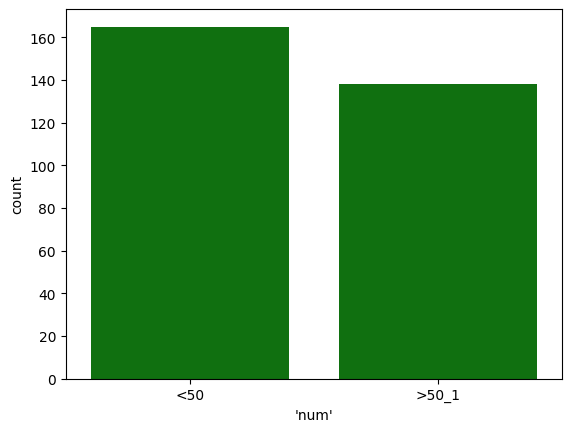

In [133]:
sns.countplot(data=Data,x="'num'", color='green')

<Axes: xlabel="'num'", ylabel='count'>

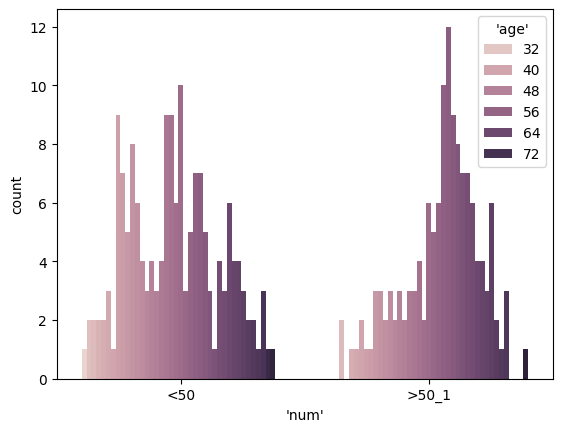

In [134]:
sns.countplot(data=Data,x="'num'",hue="'age'")

Diviser la base de données en une base de données test et d'entrainement

In [135]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (242, 14) (242, 14)
Testing set shape: (61, 14) (61, 14)


création d'un modèle de régression linéaire

In [137]:
# Generate some example data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 5 * X + np.random.randn(100, 1)

In [138]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# Create a linear regression model
model = LinearRegression()

In [140]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [141]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [142]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6536995137170024


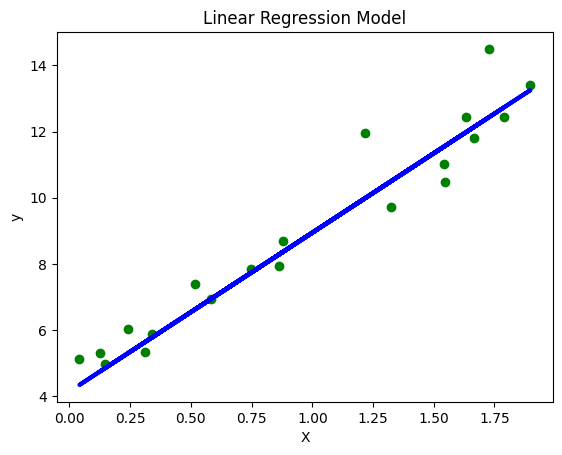

In [143]:
# Plot the regression line
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.show()